In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [3]:
df=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [38]:
df.drop(columns=['customerID'],inplace=True)

In [39]:
df.shape

(7032, 20)

In [40]:
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [41]:
df["TotalCharges"].values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [42]:
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors="coerce")

In [43]:
df["TotalCharges"]

,TotalCharges
0,29.85
1,1889.50
2,108.15
3,1840.75
4,151.65
...,...
7038,1990.50
7039,7362.90
7040,346.45
7041,306.60


In [44]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [45]:
df[df["TotalCharges"].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [46]:
df=df.dropna()

In [47]:
df.shape

(7032, 20)

In [48]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [49]:
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [50]:
df[df["Churn"]=="No"].tenure

,tenure
0,1
1,34
3,45
6,22
7,10
...,...
7037,72
7038,24
7039,72
7040,11


In [51]:
df[df["Churn"]=="No"].shape

(5163, 20)

In [52]:
tenure_churn_no=df[df["Churn"]=="No"].tenure
tenure_churn_yes=df[df["Churn"]=="Yes"].tenure

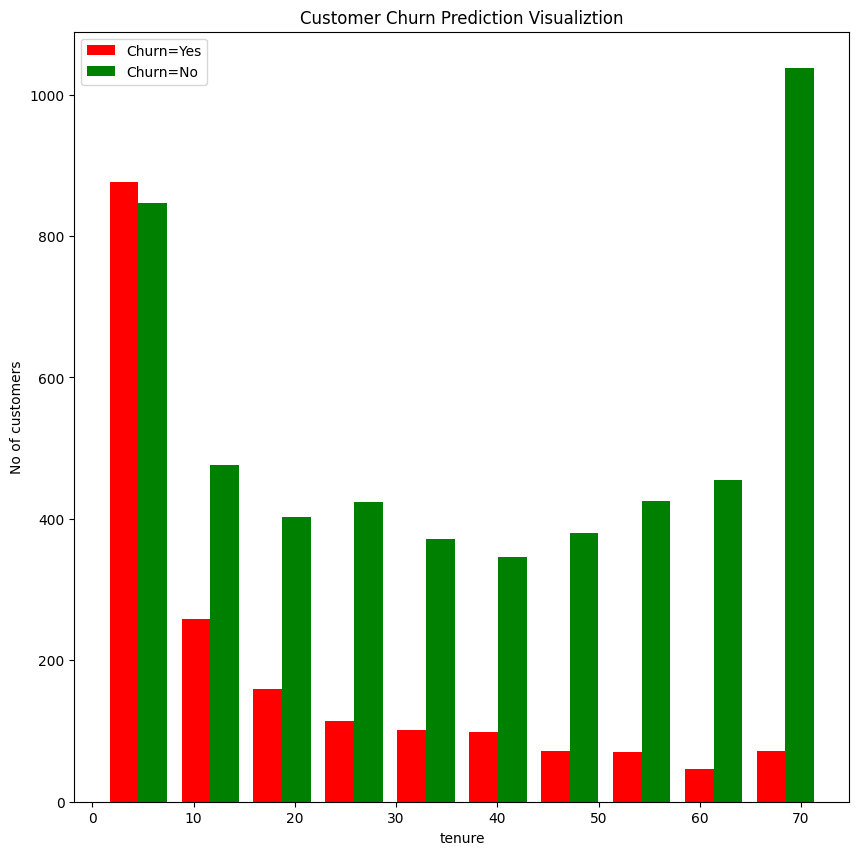

In [53]:
plt.figure(figsize=(10,10))
plt.title("Customer Churn Prediction Visualiztion")
plt.xlabel("tenure")
plt.ylabel("No of customers")
plt.hist([tenure_churn_yes,tenure_churn_no],color=["red",'green'])
plt.legend(['Churn=Yes','Churn=No'])
plt.show()

In [54]:
monthly_charge_churn_no=df[df["Churn"]=="No"].MonthlyCharges
monthly_charge_churn_yes=df[df["Churn"]=="Yes"].MonthlyCharges

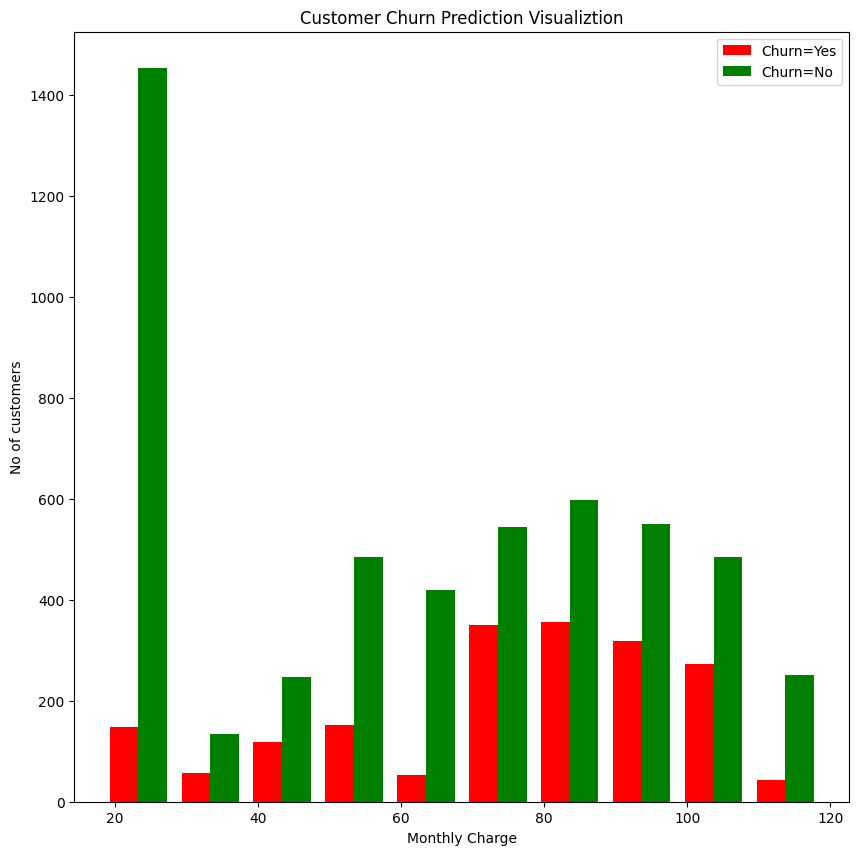

In [55]:
plt.figure(figsize=(10,10))
plt.title("Customer Churn Prediction Visualiztion")
plt.xlabel("Monthly Charge")
plt.ylabel("No of customers")
plt.hist([monthly_charge_churn_yes,monthly_charge_churn_no],color=["red",'green'])
plt.legend(['Churn=Yes','Churn=No'])
plt.show()

In [58]:
def print_unq_col(df):
 for col in df:
  if df[col].dtypes=='object':
   print(f"{col} : {df[col].unique()}")

In [59]:
print_unq_col(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [60]:
df.replace("No internet service","No",inplace=True)
df.replace("No phone service","No",inplace=True)

In [61]:
print_unq_col(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [62]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
  df[col].replace({'Yes':1,'No':0},inplace=True)

<ipython-input-62-5b56f597c9e3>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({'Yes':1,'No':0},inplace=True)
<ipython-input-62-5b56f597c9e3>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col].replace({'Yes':1,'No':0},inplace=True)


In [65]:
for col in df:
    print(f'{col}: {df[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [66]:
df['gender'].replace({'Female':1,'Male':0},inplace=True)

<ipython-input-66-7f2ac4c24de4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace({'Female':1,'Male':0},inplace=True)
<ipython-input-66-7f2ac4c24de4>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'].replace({'Female':1,'Male':0},inplace=True)


In [68]:
df.gender.unique()

array([1, 0])

One hot encoding for categorical columns

In [69]:
df=pd.get_dummies(data=df,columns=['InternetService','Contract','PaymentMethod'])

In [70]:
df.sample(8)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6293,0,0,0,1,21,1,0,0,0,0,...,False,False,True,False,False,True,False,False,False,True
4654,1,0,1,1,42,1,0,0,0,0,...,False,False,True,False,True,False,False,False,True,False
3650,0,1,0,0,71,1,1,0,0,0,...,False,False,True,False,False,True,False,False,False,True
2920,1,0,1,0,72,1,0,1,1,1,...,True,False,False,False,False,True,False,False,False,True
2330,0,0,1,1,28,1,1,0,1,0,...,True,False,False,True,False,False,False,False,True,False
600,0,0,0,0,16,1,0,0,0,0,...,False,True,False,True,False,False,False,True,False,False
1950,0,0,1,0,65,1,1,0,1,0,...,False,True,False,True,False,False,True,False,False,False
442,1,0,1,0,54,1,1,1,1,1,...,False,True,False,False,True,False,False,False,False,True


In [71]:
for col in df:
  if(df[col].dtypes=='bool'):
    df.replace({True:1,False:0},inplace=True)

<ipython-input-71-0d541edb2e9e>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({True:1,False:0},inplace=True)


In [72]:
df.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
OnlineSecurity,int64
OnlineBackup,int64
DeviceProtection,int64


In [73]:
df.sample(8)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4971,1,0,0,0,18,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
3114,0,0,0,0,5,1,0,0,0,1,...,1,0,0,1,0,0,1,0,0,0
2716,1,0,1,0,19,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
311,1,0,0,0,22,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
2923,0,0,0,0,54,1,0,1,0,1,...,0,1,0,1,0,0,0,0,0,1
209,0,0,1,0,64,1,0,0,1,1,...,0,1,0,0,1,0,0,1,0,0
4688,1,1,1,0,70,1,1,1,0,0,...,0,1,0,1,0,0,0,0,1,0
2949,1,0,0,0,56,1,0,1,0,1,...,1,0,0,0,1,0,0,1,0,0


In [79]:
scaler=MinMaxScaler()

cols_to_scaled=["tenure","MonthlyCharges","TotalCharges"]

df[cols_to_scaled]=scaler.fit_transform(df[cols_to_scaled])


In [82]:
df.sample(6)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2995,1,0,0,0,0.000000,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
457,1,0,1,1,0.408451,1,0,0,1,1,...,1,0,0,0,0,1,1,0,0,0
5590,0,0,1,1,0.338028,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
2784,1,0,0,1,0.042254,1,0,0,0,1,...,0,1,0,1,0,0,1,0,0,0
3637,0,0,0,0,0.112676,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
1957,1,0,1,0,0.633803,1,1,1,0,0,...,1,0,0,1,0,0,0,0,1,0


In [83]:
df.shape

(7032, 27)

In [85]:
X=df.drop(columns=["Churn"])
y=df["Churn"]

In [87]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [88]:
print(X_train.shape,X_test.shape)

(5625, 26) (1407, 26)


In [186]:
callback=EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True
)


In [187]:
model=Sequential()

model.add(Dense(150,activation="relu",input_dim=X_train.shape[1],kernel_initializer="he_uniform"))
model.add(Dropout(0.28))
model.add(Dense(150,activation="relu",kernel_initializer="he_uniform"))
model.add(Dropout(0.28))
model.add(Dense(150,activation="relu",kernel_initializer="he_uniform"))
model.add(Dropout(0.28))
model.add(Dense(1,activation="sigmoid"))

adam=Adam(learning_rate=0.01)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [188]:
model.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_73 (Dense)                │ (None, 150)            │         4,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 150)            │        22,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 150)            │        22,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 1)              │           151 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,501 (193.36 KB)

 Trainable params: 49,501 (193.36 KB)

 Non-trainable params: 0 (0.00 B)

In [189]:
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])

In [190]:
model.fit(X_train,y_train,epochs=100,validation_split=0.2,verbose=1,callbacks=callback)

Epoch 1/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.7693 - loss: 0.5676 - val_accuracy: 0.7787 - val_loss: 0.4394
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7867 - loss: 0.4455 - val_accuracy: 0.7858 - val_loss: 0.4496
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8032 - loss: 0.4234 - val_accuracy: 0.7849 - val_loss: 0.4493
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8077 - loss: 0.4387 - val_accuracy: 0.7787 - val_loss: 0.4493
Epoch 5/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8011 - loss: 0.4234 - val_accuracy: 0.7520 - val_loss: 0.4482
Epoch 6/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7958 - loss: 0.4263 - val_accuracy: 0.7893 - val_loss: 0.4303
Epoch 7/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8030 - loss: 0.4211 - val_accuracy: 0.7724 - val_loss: 0.4459
Epoch 8/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8141 - loss: 0.4181 - val_acc

In [191]:
model.evaluate(X_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7966 - loss: 0.4388


[0.4485105872154236, 0.7803837656974792]

In [192]:
y_predict=model.predict(X_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [195]:
y_predict

array([[0.30312604],
       [0.38310945],
       [0.01365903],
       ...,
       [0.5989173 ],
       [0.5539863 ],
       [0.6011836 ]], dtype=float32)

In [198]:
y_pred=[]

for val in y_predict:
  if val>0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [201]:
y_pred[:5]

[0, 0, 0, 1, 0]

In [203]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       999
           1       0.69      0.44      0.54       408

    accuracy                           0.78      1407
   macro avg       0.74      0.68      0.70      1407
weighted avg       0.77      0.78      0.76      1407



Text(95.72222222222221, 0.5, 'Truth')

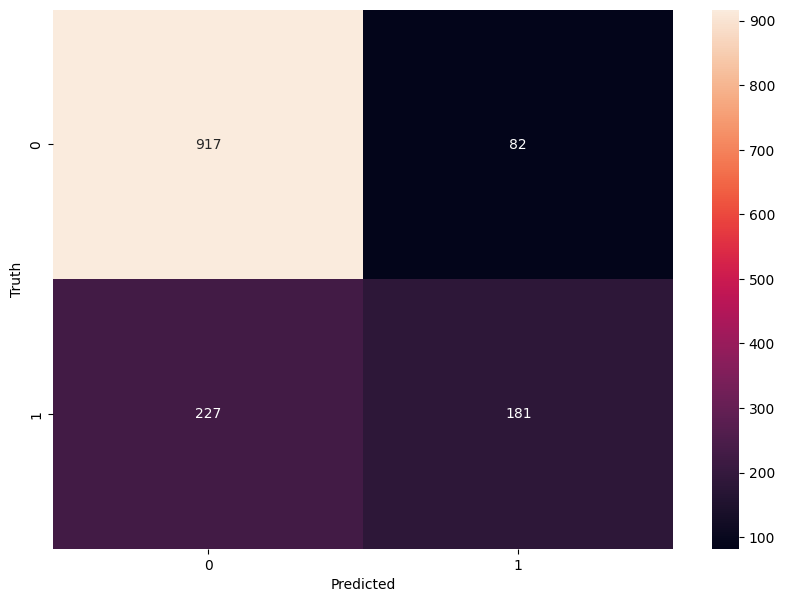

In [205]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [207]:
round((917+181)/(917+181+227+82),2)

0.78